# Midcontinent Rift geochronology notebook

This notebook generates the date bar plot that is Figure 2 of the manuscript:

Swanson-Hysell, N.L., Ramenzani, J., Fairchild, L.M. and Rose, I., **Failed rifting and fast drifting: Midcontinent Rift development, Laurentia's rapid motion and the driver of Grenvillian orogenesis**, *Geological Society of America Bulletin*, doi:10.1130/B31944.1.

The code to evaluate eruption rates and associated uncertainties for the Portage Lake Volcanics and North Shore Volcanic Group is also within this notebook.

Corresponding Author: Nicholas L. Swanson-Hysell (swanson-hysell@berkeley.edu)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

params = {'ytick.labelsize':'large'}
plt.rcParams.update(params)

## Define function to plot date bar plot

In [2]:
def plot_dates(zircon_means, zircon_2sigmas, include, sample_means, sample_2sigmas, colours, labels,\
               legend=True,figsize=None, ylim=None, lineweight=None, bbox_to_anchor=None):
    """
    Make a date distribution plot.
    
    inputs:
    - zircon_means = list of numpy arrays containing mean dates (each array being a sample)
    - zircon_2sigmas = list of numpy arrays containing 2sigmas (each array being a sample)
    - include = list of 'yes' or 'no' array for inclusion in mean (each array being a sample)
    - sample_means = list of sample mean dates (one per sample)
    - sample_2sigmas = list of sample 2sigmas (one per sample)
    - colours = list of colours (one per sample)
    - labels = list of labels (one per sample)
    - figsize = figure size (optional)
    - ylim = ylim (optional)
    - linewidth = zircon linewidth (optional)
    - bbox_to_anchor = for the legend (optional)
    """
    # formatting constants
    zircon_spacing = 0.9
    sample_spacing = 5.75 - zircon_spacing
    start_x = 3
    yes_alpha = 0.8
    no_alpha = 0.2
    x_positions = []
    if lineweight==None:
        lineweight=3
    
    # initialize current x
    current_x = start_x
    
    # number of samples
    n_samples = len(zircon_means)
    
    # plot
    if figsize == None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots(figsize=figsize)
    
    # iterate over each sample
    for i in range(n_samples):
        
        # number of zircons in sample
        n_zircons = len(zircon_means[i])
        
        # sample width
        sample_width = zircon_spacing*n_zircons
        
        # the 2sigma uncertainty on the sample age
        if sample_2sigmas != None:
            rectangle = matplotlib.patches.Rectangle((current_x-1, sample_means[i]-sample_2sigmas[i]),\
                                                     sample_width+1, sample_2sigmas[i]*2, color='lightgrey')
            ax.add_patch(rectangle)
            
        # the mean age
        if sample_means != None:
            ax.hlines(sample_means[i], current_x-1, current_x+sample_width)
            
        # legend control
        marked = False
        
        # iterate over each zircon
        for j in range(n_zircons):
            
            if marked:
                if include[i][j] == 'yes':
                    ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                              colors=colours[i], lw=lineweight, alpha=yes_alpha)
                else:
                    ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                              colors=colours[i], lw=lineweight, alpha=no_alpha)
            else:
                if include[i][j] == 'yes':
                    ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                              colors=colours[i], lw=lineweight, alpha=yes_alpha, label=labels[i])
                    marked = True
                else:
                    ax.vlines(current_x, zircon_means[i][j]-zircon_2sigmas[i][j], zircon_means[i][j]+zircon_2sigmas[i][j],\
                              colors=colours[i], lw=lineweight, alpha=no_alpha)
                
            # tick the x to the next zircon
            current_x = current_x + zircon_spacing
        
        # tick the x to the next sample
        current_x = current_x + sample_spacing
        x_positions.append(current_x-sample_spacing)
    
    # prettify
    ax.invert_yaxis()
    ax.set_ylabel('age (Ma)',fontsize=13)
    if legend == True:
        if bbox_to_anchor == None:
            ax.legend(bbox_to_anchor=(1.8,1), fontsize=12)
        else:
            ax.legend(bbox_to_anchor=bbox_to_anchor, fontsize=12)
    if ylim != None:
        ax.set_ylim(ylim)
        
    return fig, ax, x_positions

## Import new geochronology data

In [3]:
AP71 = pd.read_csv('../Data_New/Geochronology/AP71_dates.csv')
AP71.sort_values('206Pb/238U', inplace=True, ascending=False)
AP71.reset_index(inplace=True)

NSVG_RRR = pd.read_csv('../Data_New/Geochronology/NSVG-RRR_dates.csv')
NSVG_RRR.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_RRR.reset_index(inplace=True)

MP111_182 = pd.read_csv('../Data_Compiled/Geochronology/MP111-182_dates.csv')
MP111_182.sort_values('206Pb/238U', inplace=True, ascending=False)
MP111_182.reset_index(inplace=True)

CF1 = pd.read_csv('../Data_New/Geochronology/CF1_dates.csv')
CF1.sort_values('206Pb/238U', inplace=True, ascending=False)
CF1.reset_index(inplace=True)

NSVG_40I = pd.read_csv('../Data_New/Geochronology/NSVG-40I_dates.csv')
NSVG_40I.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_40I.reset_index(inplace=True)

NSVG_TH1 = pd.read_csv('../Data_New/Geochronology/NSVG-TH1_dates.csv')
NSVG_TH1.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_TH1.reset_index(inplace=True)

NSVG_PR = pd.read_csv('../Data_New/Geochronology/NSVG-PR_dates.csv')
NSVG_PR.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_PR.reset_index(inplace=True)

NSVG_GMR1 = pd.read_csv('../Data_New/Geochronology/NSVG-GMR1_dates.csv')
NSVG_GMR1.sort_values('206Pb/238U', inplace=True, ascending=False)
NSVG_GMR1.reset_index(inplace=True)

PLV_CC1 = pd.read_csv('../Data_New/Geochronology/PLV-CC1_dates.csv')
PLV_CC1.sort_values('206Pb/238U', inplace=True, ascending=False)
PLV_CC1.reset_index(inplace=True)

PLV_GS1 = pd.read_csv('../Data_New/Geochronology/PLV-GS1_dates.csv')
PLV_GS1.sort_values('206Pb/238U', inplace=True, ascending=False)
PLV_GS1.reset_index(inplace=True)

LST_KP1 = pd.read_csv('../Data_Compiled/Geochronology/LST-KP1_dates.csv')
LST_KP1.sort_values('206Pb/238U', inplace=True, ascending=False)
LST_KP1.reset_index(inplace=True)

BBC_SBA1 = pd.read_csv('../Data_Compiled/Geochronology/BBC-SBA1_dates.csv')
BBC_SBA1.sort_values('206Pb/238U', inplace=True, ascending=False)
BBC_SBA1.reset_index(inplace=True)

MI_WSB1 = pd.read_csv('../Data_Compiled/Geochronology/MI-WSB1_dates.csv')
MI_WSB1.sort_values('206Pb/238U', inplace=True, ascending=False)
MI_WSB1.reset_index(inplace=True)

MI_DI1 = pd.read_csv('../Data_Compiled/Geochronology/MI-DI1_dates.csv')
MI_DI1.sort_values('206Pb/238U', inplace=True, ascending=False)
MI_DI1.reset_index(inplace=True)

## Input weighted mean dates calculated in ET_redux and generate plot

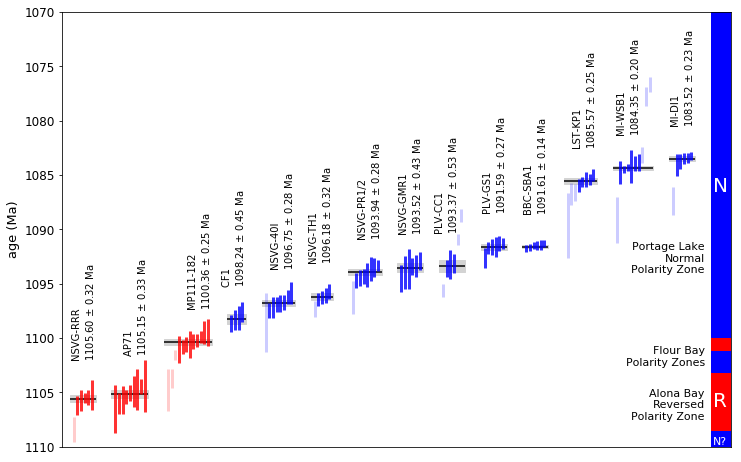

In [4]:
zircon_means = [NSVG_RRR['206Pb/238U'],
                AP71['206Pb/238U'],
                MP111_182['206Pb/238U'],
                CF1['206Pb/238U'],
                NSVG_40I['206Pb/238U'],
                NSVG_TH1['206Pb/238U'],
                NSVG_PR['206Pb/238U'],
                NSVG_GMR1['206Pb/238U'],
                PLV_CC1['206Pb/238U'],
                PLV_GS1['206Pb/238U'],
                BBC_SBA1['206Pb/238U'],
                LST_KP1['206Pb/238U'],
                MI_WSB1['206Pb/238U'],
                MI_DI1['206Pb/238U']]
zircon_2sigmas = [NSVG_RRR['206Pb/238U_2sigma'],
                  AP71['206Pb/238U_2sigma'],
                  MP111_182['206Pb/238U_2sigma'],
                  CF1['206Pb/238U_2sigma'],
                  NSVG_40I['206Pb/238U_2sigma'],
                  NSVG_TH1['206Pb/238U_2sigma'],
                  NSVG_PR['206Pb/238U_2sigma'],
                  NSVG_GMR1['206Pb/238U_2sigma'],
                  PLV_CC1['206Pb/238U_2sigma'],
                  PLV_GS1['206Pb/238U_2sigma'],
                  BBC_SBA1['206Pb/238U_2sigma'],
                  LST_KP1['206Pb/238U_2sigma'],
                  MI_WSB1['206Pb/238U_2sigma'],
                  MI_DI1['206Pb/238U_2sigma']]
include = [NSVG_RRR['include'],AP71['include'],
           MP111_182['include'],CF1['include'],
           NSVG_40I['include'],NSVG_TH1['include'],
           NSVG_PR['include'],NSVG_GMR1['include'],
           PLV_CC1['include'],PLV_GS1['include'],
           BBC_SBA1['include'],
           LST_KP1['include'],
           MI_WSB1['include'],MI_DI1['include']]
NSVG_RRR_mean = 1105.60
AP71_mean = 1105.15
MP111_182_mean = 1100.36
CF1_mean = 1098.24
NSVG_40I_mean = 1096.75
NSVG_TH1_mean = 1096.18
NSVG_PR_mean = 1093.94
NSVG_GMR1_mean = 1093.52
PLV_CC1_mean = 1093.37
PLV_GS1_mean = 1091.59
BBC_SBA1_mean = 1091.61
LST_KP1_mean = 1085.57
MI_WSB1_mean = 1084.35
MI_DI1_mean = 1083.52

sample_means = [NSVG_RRR_mean, AP71_mean, MP111_182_mean, CF1_mean, NSVG_40I_mean,
                NSVG_TH1_mean, NSVG_PR_mean, NSVG_GMR1_mean, PLV_CC1_mean, PLV_GS1_mean,
                BBC_SBA1_mean, LST_KP1_mean, MI_WSB1_mean, MI_DI1_mean]

NSVG_RRR_2sigma = 0.32
AP71_2sigma = 0.33
MP111_182_2sigma = 0.25
CF1_2sigma = 0.45
NSVG_40I_2sigma = 0.28
NSVG_TH1_2sigma = 0.32
NSVG_PR_2sigma = 0.28
NSVG_GMR1_2sigma = 0.43
PLV_CC1_2sigma = 0.53
PLV_GS1_2sigma = 0.27
BBC_SBA1_2sigma = 0.14
LST_KP1_2sigma = 0.25
MI_WSB1_2sigma = 0.20
MI_DI1_2sigma = 0.23

sample_2sigmas = [NSVG_RRR_2sigma, AP71_2sigma, MP111_182_2sigma, CF1_2sigma, NSVG_40I_2sigma,
                NSVG_TH1_2sigma, NSVG_PR_2sigma, NSVG_GMR1_2sigma, PLV_CC1_2sigma, PLV_GS1_2sigma,
                BBC_SBA1_2sigma, LST_KP1_2sigma, MI_WSB1_2sigma, MI_DI1_2sigma]

colors = ['red','red','red',
          'blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue']
labels = ['Red Rock Rhyolite',
          'Agate Point Rhyolite',
          'Flour Bay tuff',
          'Kallander Creek Rhyolite',
          '40th Ave Icelandite',
          'Two Harbors Icelandite',
          'Palisade Rhyolite',
          'Grand Marais Rhyolite',
          'Copper City Flow',
          'Greenstone Flow',
          'Silver Bay Aplite',
          'Lake Shore Trap andesite',
          'West Sand Bay Tuff',
          'Davieux Island Rhyolite']

fig, ax, x_positions = plot_dates(zircon_means, zircon_2sigmas, 
                                  include, sample_means, sample_2sigmas, 
                                  colors, labels, legend=False, figsize=(12,8))
ax.set_ylim(1110,1070)
ax.set_xlim(0,165)
ax.set_xticks([])
ax.text(x_positions[0],1105.60-3.5,'NSVG-RRR \n1105.60 $\pm$ 0.32 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[1],1105.15-3.5,'AP71 \n1105.15 $\pm$ 0.33 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[2],1100.36-3,'MP111-182 \n1100.36 $\pm$ 0.25 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[3],1098.24-3,'CF1 \n1098.24 $\pm$ 0.45 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[4],1096.75-3,'NSVG-40I \n1096.75 $\pm$ 0.28 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[5],1096.18-3,'NSVG-TH1 \n1096.18 $\pm$ 0.32 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[6],1093.94-3,'NSVG-PR1/2 \n1093.94 $\pm$ 0.28 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[7],1093.52-3,'NSVG-GMR1 \n1093.52 $\pm$ 0.43 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[8]-1.5,1093.37-3,'PLV-CC1 \n1093.37 $\pm$ 0.53 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[9],1091.59-3,'PLV-GS1 \n1091.59 $\pm$ 0.27 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[10],1091.61-3,'BBC-SBA1 \n1091.61 $\pm$ 0.14 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[11],1085.57-3,'LST-KP1 \n1085.57 $\pm$ 0.25 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[12]-3,MI_WSB1_mean-3,'MI-WSB1 \n1084.35 $\pm$ 0.20 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)
ax.text(x_positions[13],1083.52-3,'MI-DI1 \n1083.52 $\pm$ 0.23 Ma',size='10',horizontalalignment='right',
        verticalalignment='bottom',multialignment='left',rotation=90)

pre_Alona_Bay_N = matplotlib.patches.Rectangle((160, 1108.5), 5, 1.5, color='blue')
ax.add_patch(pre_Alona_Bay_N)
ax.text(160.5, 1109.5,'N?',size='11',color='white',verticalalignment='center')

Alona_Bay_R = matplotlib.patches.Rectangle((160, 1103.1), 5, 5.4, color='red')
ax.add_patch(Alona_Bay_R)
ax.text(160.5, 1105.8,'R',size='20',color='white',verticalalignment='center')
ax.text(158.5, 1107.5,'Alona Bay\nReversed\nPolarity Zone',size='11',horizontalalignment='right')

Flour_Bay_N = matplotlib.patches.Rectangle((160, 1101.1), 5, 2, color='blue')
ax.add_patch(Flour_Bay_N)
Flour_Bay_R = matplotlib.patches.Rectangle((160, 1099.9), 5, 1.2, color='red')
ax.add_patch(Flour_Bay_R)
ax.text(158.5, 1102.5,'Flour Bay\nPolarity Zones',size='11',horizontalalignment='right')

Portage_Lake_N = matplotlib.patches.Rectangle((160, 1070), 5, 29.9, color='blue')
ax.add_patch(Portage_Lake_N)
ax.text(160.5, 1086,'N',size='20',color='white',verticalalignment='center')
ax.text(158.5, 1094,'Portage Lake\nNormal\nPolarity Zone',size='11',horizontalalignment='right')


#plt.savefig('../Manuscript/Figures/MCR_dates_raw.pdf')
plt.show(fig)

## Estimate subsidence rates based on geochronology

Davis and Paces (1990) used dates developed from the Keweenaw Peninsula to calculate the implied eruption/subsidence rate for the Portage Lake Volcanics. A similar analysis is conducted here for the Portage Lake Volcanics and the North Shore Volcanic Group. To get an uncertainty associated with the eruption rate, the ages are drawn from normal distributions and the resulting rates are calculated.

In [5]:
samplesize=500000000
np.random.seed(1)
GS_MCages=np.random.normal(PLV_GS1_mean,PLV_GS1_2sigma/2,samplesize)
CC_MCages=np.random.normal(PLV_CC1_mean,PLV_CC1_2sigma/2,samplesize)

GS_CC_strat_m = 2850
GS_CC_strat_cm = GS_CC_strat_m * 100

GS_CC_time_Myr = CC_MCages-GS_MCages
GS_CC_time_yr = GS_CC_time_Myr * 10**6
GS_CC_rates = GS_CC_strat_cm/GS_CC_time_yr

GS_CC_rates_median = np.median(GS_CC_rates)
GS_CC_rates_low = np.percentile(GS_CC_rates,2.5)
GS_CC_rates_high = np.percentile(GS_CC_rates,97.5)
print(GS_CC_rates_median)
print(GS_CC_rates_low)
print(GS_CC_rates_high)

0.16011278095109321
0.12061512965011364
0.2380802873943056


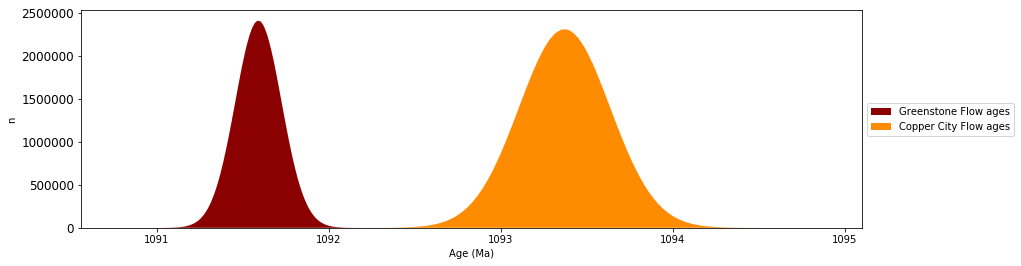

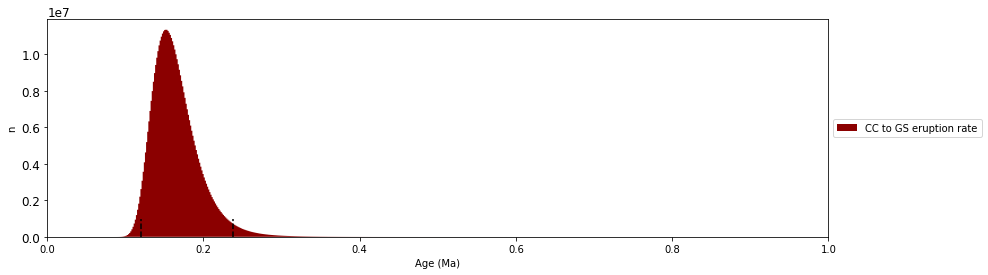

In [6]:
plt.figure(figsize=(14,4))
plt.hist(GS_MCages,1000,histtype='stepfilled',color='darkred',label='Greenstone Flow ages')
plt.hist(CC_MCages,1000,histtype='stepfilled',color='darkorange',label='Copper City Flow ages')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(14,4))
plt.hist(GS_CC_rates,10000,histtype='stepfilled',color='darkred',label='CC to GS eruption rate')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,1)
plt.vlines(GS_CC_rates_low,0,10000000,linestyles='dashed')
plt.vlines(GS_CC_rates_high,0,10000000,linestyles='dashed')
plt.show()

In [7]:
samplesize=500000000
np.random.seed(1)
FourIce_MCages=np.random.normal(NSVG_40I_mean,NSVG_40I_2sigma/2,samplesize)
PR_MCages=np.random.normal(NSVG_PR_mean,NSVG_PR_2sigma/2,samplesize)

FourIce_PR_strat_m = 5988
FourIce_PR_strat_cm = FourIce_PR_strat_m * 100

FourIce_PR_time_Myr = FourIce_MCages-PR_MCages
FourIce_PR_time_yr = FourIce_PR_time_Myr * 10**6
FourIce_PR_rates = FourIce_PR_strat_cm/FourIce_PR_time_yr

FourIce_PR_rates_median = np.median(FourIce_PR_rates)
FourIce_PR_rates_low = np.percentile(FourIce_PR_rates,2.5)
FourIce_PR_rates_high = np.percentile(FourIce_PR_rates,97.5)
print(FourIce_PR_rates_median)
print(FourIce_PR_rates_low)
print(FourIce_PR_rates_high)

0.21309637380295063
0.18723953841621824
0.24723851347107167


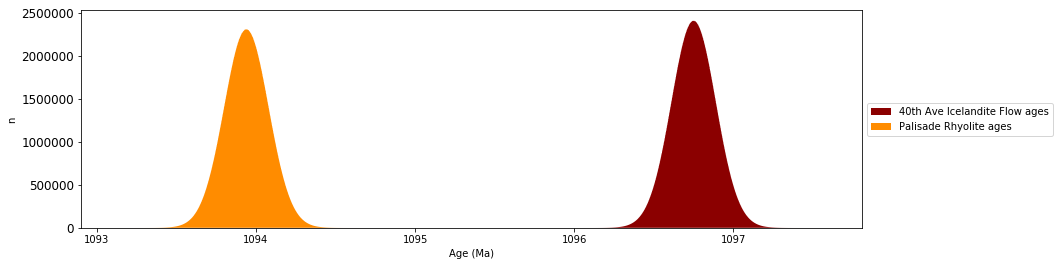

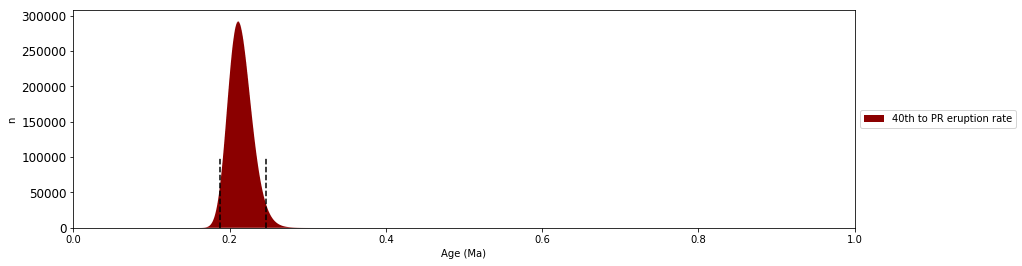

In [8]:
plt.figure(figsize=(14,4))
plt.hist(FourIce_MCages,1000,histtype='stepfilled',color='darkred',label='40th Ave Icelandite Flow ages')
plt.hist(PR_MCages,1000,histtype='stepfilled',color='darkorange',label='Palisade Rhyolite ages')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(14,4))
plt.hist(FourIce_PR_rates,10000,histtype='stepfilled',color='darkred',label='40th to PR eruption rate')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,1)
plt.vlines(FourIce_PR_rates_low,0,100000,linestyles='dashed')
plt.vlines(FourIce_PR_rates_high,0,100000,linestyles='dashed')
plt.show()